版权声明：本材料是南开大学“python语言与机器学习”课程课件，版权归课程老师朱开恩所有。允许拷贝、分发使用，允许修改，但是请保留此版权声明。

版本时间：2020年9月

# pandas介绍

Pandas是python的一个数据分析包，基于NumPy 的一种工具，它提供了两种主要的数据结构：
（1）Series：一维数组，与Numpy中的一维array类似。
（2）DataFrame：二维的表格型数据结构。
Pandas对时间序列(Time Series)提供了很好的支持。

Pandas的名称来自于面板数据（panel data）和python数据分析（data analysis）。


十分钟教程： https://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('earthquake_data.csv', index_col='日期')

In [4]:
data.head()

,时间,纬度(°),经度(°),深度(km),震级类型,震级值,事件类型,参考地名
日期,,,,,,,,
2013-06-25,06:04:13.0,10.70,-42.60,10,Ms,6.5,eq,中大西洋海岭北部
2013-06-24,14:34:48.7,44.33,84.10,6,Ms,4.1,eq,新疆维吾尔自治区塔城地区乌苏市
2013-06-24,13:02:01.9,44.31,84.17,8,Ms,4.3,eq,新疆维吾尔自治区塔城地区乌苏市
2013-06-24,11:44:20.8,39.42,95.50,6,Ms,3.4,eq,甘肃省酒泉市肃北蒙古族自治县
2013-06-24,01:54:09.5,25.59,99.43,10,Ms,3.3,eq,云南省大理白族自治州永平县、云龙县交界地区


# Series

## 创建

In [5]:
s1 = pd.Series([1,3,np.nan,'hello'])

In [6]:
s1

0        1
1        3
2      NaN
3    hello
dtype: object

In [7]:
s2 = pd.Series(data=[1,3,np.nan,'hello'],index = ['a','b','c','d'])

In [8]:
s2

a        1
b        3
c      NaN
d    hello
dtype: object

In [9]:
dates = pd.date_range('20130101', periods=4)
s3 = pd.Series(data=[1,3,np.nan,'hello'],index = dates)

In [10]:
s3

2013-01-01        1
2013-01-02        3
2013-01-03      NaN
2013-01-04    hello
Freq: D, dtype: object

## 访问

用index访问

In [25]:
s1[0],s2['b'],s3['2013-01-04']

(1, 3, 'hello')

用下标访问，注意整数作为下标的情形。

In [18]:
s1[0],s2[1],s3[2], s3[3]

(1, 3, nan, 'hello')

In [42]:
s3[1:4]

2013-01-02        3
2013-01-03      NaN
2013-01-04    hello
Freq: D, dtype: object

In [31]:
s1_v2 = pd.Series(data=[1,3,np.nan,'hello'],index = [5,6,7,8])

In [32]:
s1_v2

5        1
6        3
7      NaN
8    hello
dtype: object

In [33]:
s1_v2[8]

'hello'

In [43]:
s1_v2[1:4]

6        3
7      NaN
8    hello
dtype: object

In [44]:
s1_v2[2]

KeyError: 2

## 索引index

In [26]:
s1.index

RangeIndex(start=0, stop=4, step=1)

In [35]:
s1_v2.index

Int64Index([5, 6, 7, 8], dtype='int64')

In [28]:
s2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
s3.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

In [30]:
s3.index[0]

Timestamp('2013-01-01 00:00:00', freq='D')

index可以重复。

In [36]:
s4 = pd.Series(data=[1,3,np.nan,'hello'],index = ['a','b','a','d'])

In [37]:
s4

a        1
b        3
a      NaN
d    hello
dtype: object

In [38]:
s4['d']

'hello'

In [39]:
s4['a']

a      1
a    NaN
dtype: object

In [40]:
type(s4['a'])

pandas.core.series.Series

## 更改索引index

In [45]:
s5 = s2.copy()
print(s5)

a        1
b        3
c      NaN
d    hello
dtype: object


In [46]:
s5.reindex(['d','b','a','c'])

d    hello
b        3
a        1
c      NaN
dtype: object

In [47]:
s5

a        1
b        3
c      NaN
d    hello
dtype: object

In [48]:
s5.index = [2,8, 3,4]

In [49]:
s5

2        1
8        3
3      NaN
4    hello
dtype: object

In [50]:
s6 = s4.copy()

In [51]:
s6

a        1
b        3
a      NaN
d    hello
dtype: object

In [52]:
s6.index = [2,8, 3,4]

In [53]:
s6

2        1
8        3
3      NaN
4    hello
dtype: object

# DataFrame

## 创建

In [54]:
df1 = pd.DataFrame(np.random.randn(4,3), columns=list('ABC'))

In [55]:
df1

,A,B,C
0,-0.848654,0.808563,0.296141
1,-1.639580,1.178314,0.204160
2,0.549660,-2.283457,1.456003
3,1.718785,-2.325075,-0.332649


In [56]:
dates = pd.date_range('20130101', periods=7)
df2 = pd.DataFrame(np.random.randn(7,3), index=dates, columns=list('ABC'))

In [57]:
df2

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


## 查看

In [58]:
df2.head()

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555


In [59]:
df2.head(2)

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055


In [60]:
df2.tail()

,A,B,C
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [61]:
df2.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [62]:
df1.columns

Index(['A', 'B', 'C'], dtype='object')

In [63]:
df1.values

array([[-0.84865361,  0.80856252,  0.29614077],
       [-1.63958044,  1.17831378,  0.20415964],
       [ 0.54966026, -2.28345669,  1.45600343],
       [ 1.71878502, -2.32507529, -0.33264924]])

## 简单统计

In [64]:
df2.describe()

,A,B,C
count,7.000000,7.000000,7.000000
mean,-0.274974,-0.177480,-0.174247
std,1.156541,0.670290,1.277299
min,-2.344781,-0.857133,-2.006055
25%,-0.731189,-0.745291,-0.981922
50%,-0.081125,-0.192127,0.042555
75%,0.451236,0.158929,0.572466
max,1.060994,0.979626,1.562686


## 排序

In [65]:
df2.sort_index(ascending=False) # 倒序

,A,B,C
2013-01-07,-0.956843,-0.746293,-1.670458
2013-01-06,-0.505535,0.050464,1.562686
2013-01-05,0.035203,-0.744289,0.042555
2013-01-04,1.060994,-0.857133,0.599732
2013-01-03,0.867269,0.267394,0.545200
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-01,-0.081125,-0.192127,-0.293385


In [66]:
df2.sort_index(axis=1, ascending=False) # 抬头栏排序

,C,B,A
2013-01-01,-0.293385,-0.192127,-0.081125
2013-01-02,-2.006055,0.979626,-2.344781
2013-01-03,0.545200,0.267394,0.867269
2013-01-04,0.599732,-0.857133,1.060994
2013-01-05,0.042555,-0.744289,0.035203
2013-01-06,1.562686,0.050464,-0.505535
2013-01-07,-1.670458,-0.746293,-0.956843


In [67]:
df2.sort_values(by='B')

,A,B,C
2013-01-04,1.060994,-0.857133,0.599732
2013-01-07,-0.956843,-0.746293,-1.670458
2013-01-05,0.035203,-0.744289,0.042555
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-06,-0.505535,0.050464,1.562686
2013-01-03,0.867269,0.267394,0.545200
2013-01-02,-2.344781,0.979626,-2.006055


In [68]:
df2 # 前面的几个函数返回新的DataFrame，原来的数据没有破坏

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


## 访问

In [69]:
df2['A']

2013-01-01   -0.081125
2013-01-02   -2.344781
2013-01-03    0.867269
2013-01-04    1.060994
2013-01-05    0.035203
2013-01-06   -0.505535
2013-01-07   -0.956843
Freq: D, Name: A, dtype: float64

In [70]:
df2.A

2013-01-01   -0.081125
2013-01-02   -2.344781
2013-01-03    0.867269
2013-01-04    1.060994
2013-01-05    0.035203
2013-01-06   -0.505535
2013-01-07   -0.956843
Freq: D, Name: A, dtype: float64

In [71]:
df2[['A','C']]

,A,C
2013-01-01,-0.081125,-0.293385
2013-01-02,-2.344781,-2.006055
2013-01-03,0.867269,0.545200
2013-01-04,1.060994,0.599732
2013-01-05,0.035203,0.042555
2013-01-06,-0.505535,1.562686
2013-01-07,-0.956843,-1.670458


In [72]:
df2['20130102':'20130104'] # 注意包含了最后的字符串对应的索引

,A,B,C
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732


In [73]:
df2[1:4]

,A,B,C
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732


In [74]:
df2[2] # 错误！没有一列叫做2。不是访问第二行

KeyError: 2

In [75]:
df2[2:3] # 只有一行的表格

,A,B,C
2013-01-03,0.867269,0.267394,0.5452


In [76]:
df2.loc['2013-1-3'] # 第二行，是一个Series

A    0.867269
B    0.267394
C    0.545200
Name: 2013-01-03 00:00:00, dtype: float64

In [77]:
dates[2]

Timestamp('2013-01-03 00:00:00', freq='D')

In [78]:
df2.loc[dates[2]]  # 第二行，是一个Series

A    0.867269
B    0.267394
C    0.545200
Name: 2013-01-03 00:00:00, dtype: float64

In [79]:
df2.iloc[2] # 第二行，是一个Series

A    0.867269
B    0.267394
C    0.545200
Name: 2013-01-03 00:00:00, dtype: float64

In [80]:
df2.iloc[2, 1]  # 下标方式访问表格元素

0.267394449764506

In [81]:
df2.loc['2013-1-3', 'B'] # 键值方式访问

0.267394449764506

In [82]:
df2.loc['2013-1-3', ['C','B']]

C    0.545200
B    0.267394
Name: 2013-01-03 00:00:00, dtype: float64

In [83]:
df2.loc['2013-1-3':'2013-1-5', 'B']

2013-01-03    0.267394
2013-01-04   -0.857133
2013-01-05   -0.744289
Freq: D, Name: B, dtype: float64

In [84]:
df2.loc['2013-1-3':'2013-1-5', ['C','B']]

,C,B
2013-01-03,0.545200,0.267394
2013-01-04,0.599732,-0.857133
2013-01-05,0.042555,-0.744289


In [85]:
df2.iloc[:3, 1:]

,B,C
2013-01-01,-0.192127,-0.293385
2013-01-02,0.979626,-2.006055
2013-01-03,0.267394,0.545200


In [86]:
df2.iat[2, 1]  # 比 df2.iloc[2,1] 快

0.267394449764506

In [87]:
df2.at[dates[2], 'B'] # 比 df2.loc[dates[2], 'B'] 快

0.267394449764506

In [88]:
df2.iat[2:3, 1] # iat, at 缺点：不能用slice

ValueError: iAt based indexing can only have integer indexers

## 更改

### 改部分元素的值

In [106]:
df = df2.copy()

In [107]:
df

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [108]:
df.iloc[0,0] = -99
df.loc['2013-1-7', 'C'] = 555

In [109]:
df

,A,B,C
2013-01-01,-99.000000,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,555.000000


In [110]:
df.iloc[1:3, :2] = 100

In [111]:
df

,A,B,C
2013-01-01,-99.000000,-0.192127,-0.293385
2013-01-02,100.000000,100.000000,-2.006055
2013-01-03,100.000000,100.000000,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,555.000000


### slice方式要注意的问题

In [112]:
df[:2]

,A,B,C
2013-01-01,-99.0,-0.192127,-0.293385
2013-01-02,100.0,100.000000,-2.006055


In [131]:
df[:2].A = -1 # ！！！ 在slice上改会报错

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [121]:
df.iloc[:2, :1]

,A
2013-01-01,-99.0
2013-01-02,100.0


In [127]:
df.iloc[:2, :1] = -333  # 在原df上用iloc直接改

In [128]:
df

,A,B,C
2013-01-01,-333.000000,-1.000000,-1.000000
2013-01-02,-333.000000,-1.000000,-1.000000
2013-01-03,100.000000,100.000000,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,555.000000


In [129]:
df[:2] = -1   # 在原df上直接改

In [130]:
df

,A,B,C
2013-01-01,-1.000000,-1.000000,-1.000000
2013-01-02,-1.000000,-1.000000,-1.000000
2013-01-03,100.000000,100.000000,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,555.000000


In [100]:
df = df2.copy()

In [101]:
df

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [102]:
df[:2][:]

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055


In [103]:
df[:2][['A','B']] = -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2544: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [104]:
df

,A,B,C
2013-01-01,-1.000000,-1.000000,-0.293385
2013-01-02,-1.000000,-1.000000,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


### 列的操作

In [149]:
df = df2.copy()

In [150]:
df

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [151]:
df['D'] = np.arange(len(df)) # 加一列

In [152]:
df

,A,B,C,D
2013-01-01,-0.081125,-0.192127,-0.293385,0
2013-01-02,-2.344781,0.979626,-2.006055,1
2013-01-03,0.867269,0.267394,0.545200,2
2013-01-04,1.060994,-0.857133,0.599732,3
2013-01-05,0.035203,-0.744289,0.042555,4
2013-01-06,-0.505535,0.050464,1.562686,5
2013-01-07,-0.956843,-0.746293,-1.670458,6


In [153]:
df[['A','D']]  # 挑出指定的列

,A,D
2013-01-01,-0.081125,0
2013-01-02,-2.344781,1
2013-01-03,0.867269,2
2013-01-04,1.060994,3
2013-01-05,0.035203,4
2013-01-06,-0.505535,5
2013-01-07,-0.956843,6


In [154]:
df.drop(['D',], axis=1) # 删除列，drop函数默认删除行，列需要加axis = 1

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [156]:
df # drop函数返回新表

,A,B,C,D
2013-01-01,-0.081125,-0.192127,-0.293385,0
2013-01-02,-2.344781,0.979626,-2.006055,1
2013-01-03,0.867269,0.267394,0.545200,2
2013-01-04,1.060994,-0.857133,0.599732,3
2013-01-05,0.035203,-0.744289,0.042555,4
2013-01-06,-0.505535,0.050464,1.562686,5
2013-01-07,-0.956843,-0.746293,-1.670458,6


### 行删除

In [157]:
df.drop([df.index[4], df.index[6]])

,A,B,C,D
2013-01-01,-0.081125,-0.192127,-0.293385,0
2013-01-02,-2.344781,0.979626,-2.006055,1
2013-01-03,0.867269,0.267394,0.545200,2
2013-01-04,1.060994,-0.857133,0.599732,3
2013-01-06,-0.505535,0.050464,1.562686,5


In [158]:
df = df1.copy()

In [159]:
df

,A,B,C
0,-0.848654,0.808563,0.296141
1,-1.639580,1.178314,0.204160
2,0.549660,-2.283457,1.456003
3,1.718785,-2.325075,-0.332649


In [160]:
df.drop([2,])

,A,B,C
0,-0.848654,0.808563,0.296141
1,-1.639580,1.178314,0.204160
3,1.718785,-2.325075,-0.332649


In [161]:
df

,A,B,C
0,-0.848654,0.808563,0.296141
1,-1.639580,1.178314,0.204160
2,0.549660,-2.283457,1.456003
3,1.718785,-2.325075,-0.332649


In [162]:
df.drop([2,], inplace=True)

In [163]:
df

,A,B,C
0,-0.848654,0.808563,0.296141
1,-1.639580,1.178314,0.204160
3,1.718785,-2.325075,-0.332649


## 筛选

### 布尔筛选

In [164]:
s = pd.Series(range(-3, 4))
print(s)

0   -3
1   -2
2   -1
3    0
4    1
5    2
6    3
dtype: int64


In [165]:
s > 0

0    False
1    False
2    False
3    False
4     True
5     True
6     True
dtype: bool

In [166]:
s[s>0]

4    1
5    2
6    3
dtype: int64

In [167]:
s[(s < -1) | (s > 0.5)]

0   -3
1   -2
4    1
5    2
6    3
dtype: int64

In [168]:
s[~(s < 0)]

3    0
4    1
5    2
6    3
dtype: int64

In [169]:
df = df2.copy()

In [170]:
df

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [171]:
df[df['A']>0.5]

,A,B,C
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732


In [172]:
df[df.A>0.5]

,A,B,C
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732


In [173]:
df.query('A>0.5')

,A,B,C
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732


In [174]:
df[(df.A>0.5) & (df.B<0)] # 注意要加 ()

,A,B,C
2013-01-04,1.060994,-0.857133,0.599732


In [175]:
df.query('A>0.5 & B<0')

,A,B,C
2013-01-04,1.060994,-0.857133,0.599732


In [176]:
df.query('(A>0.5) & (B<0)')

,A,B,C
2013-01-04,1.060994,-0.857133,0.599732


In [177]:
df.query('A>0.5 and B<0')

,A,B,C
2013-01-04,1.060994,-0.857133,0.599732


In [178]:
df.query('A < B < C')

,A,B,C
2013-01-06,-0.505535,0.050464,1.562686


In [179]:
df = pd.DataFrame({'a': list('aabbccddeeff'), 
                   'b': list('aaaabbbbcccc'),
                   'd': np.random.randint(9, size=12)})

In [180]:
df

,a,b,d
0,a,a,4
1,a,a,0
2,b,a,3
3,b,a,8
4,c,b,6
5,c,b,7
6,d,b,6
7,d,b,8
8,e,c,3
9,e,c,6


In [181]:
df.query('a in b') 
# 等价于 df[df.a.isin(df.b)]

,a,b,d
0,a,a,4
1,a,a,0
2,b,a,3
3,b,a,8
4,c,b,6
5,c,b,7


In [182]:
df.query('a not in b')

,a,b,d
6,d,b,6
7,d,b,8
8,e,c,3
9,e,c,6
10,f,c,6
11,f,c,2


In [183]:
df.query('a == ["a", "b", "c"]')
# df[df.a.isin(["a", "b", "c"])]

,a,b,d
0,a,a,4
1,a,a,0
2,b,a,3
3,b,a,8
4,c,b,6
5,c,b,7


In [184]:
df.query('d == [1, 2]')

,a,b,d
11,f,c,2


In [185]:
df.query('[1, 2] in d')

,a,b,d
11,f,c,2


In [186]:
df.query('d != [1, 2]')

,a,b,d
0,a,a,4
1,a,a,0
2,b,a,3
3,b,a,8
4,c,b,6
5,c,b,7
6,d,b,6
7,d,b,8
8,e,c,3
9,e,c,6


In [187]:
df.query('d != [1, 2] and a==["e","g"]')

,a,b,d
8,e,c,3
9,e,c,6


#### 筛选并赋值

In [188]:
df = df2.copy()

In [189]:
df[df < 0] = 0

In [190]:
df

,A,B,C
2013-01-01,0.000000,0.000000,0.000000
2013-01-02,0.000000,0.979626,0.000000
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,0.000000,0.599732
2013-01-05,0.035203,0.000000,0.042555
2013-01-06,0.000000,0.050464,1.562686
2013-01-07,0.000000,0.000000,0.000000


#### where

In [191]:
df3 = df2.copy()
df = df2.copy()

In [192]:
df3 += 500

In [193]:
df3

,A,B,C
2013-01-01,499.918875,499.807873,499.706615
2013-01-02,497.655219,500.979626,497.993945
2013-01-03,500.867269,500.267394,500.545200
2013-01-04,501.060994,499.142867,500.599732
2013-01-05,500.035203,499.255711,500.042555
2013-01-06,499.494465,500.050464,501.562686
2013-01-07,499.043157,499.253707,498.329542


In [194]:
df

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


The signature for DataFrame.where() differs from numpy.where(). Roughly df1.where(m, df2) is equivalent to np.where(m, df1, df2).

In [195]:
# 小于0不动，大于等于0时取df3
df.where(df<0, df3)

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,500.979626,-2.006055
2013-01-03,500.867269,500.267394,500.545200
2013-01-04,501.060994,-0.857133,500.599732
2013-01-05,500.035203,-0.744289,500.042555
2013-01-06,-0.505535,500.050464,501.562686
2013-01-07,-0.956843,-0.746293,-1.670458


In [196]:
df

,A,B,C
2013-01-01,-0.081125,-0.192127,-0.293385
2013-01-02,-2.344781,0.979626,-2.006055
2013-01-03,0.867269,0.267394,0.545200
2013-01-04,1.060994,-0.857133,0.599732
2013-01-05,0.035203,-0.744289,0.042555
2013-01-06,-0.505535,0.050464,1.562686
2013-01-07,-0.956843,-0.746293,-1.670458


### 列表筛选

In [197]:
s

0   -3
1   -2
2   -1
3    0
4    1
5    2
6    3
dtype: int64

In [198]:
s[[1,3]] # index筛选

1   -2
3    0
dtype: int64

In [199]:
s.isin([1, 3])

0    False
1    False
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [200]:
s[ s.isin([1, 3]) ] # 值筛选

4    1
6    3
dtype: int64

In [201]:
s.index.isin([1,3])

array([False,  True, False,  True, False, False, False])

In [202]:
s[ s.index.isin([1,3]) ] # index筛选

1   -2
3    0
dtype: int64

In [203]:
df = pd.DataFrame({'vals': [1, 2, 3, 4], 
                   'ids': ['a', 'b', 'f', 'n'],
                   'ids2': ['a', 'n', 'c', 'n']})

In [204]:
df

,ids,ids2,vals
0,a,a,1
1,b,n,2
2,f,c,3
3,n,n,4


In [205]:
values = ['a', 'b', 1, 3]

In [206]:
df.isin(values)

,ids,ids2,vals
0,True,True,True
1,True,False,False
2,False,False,True
3,False,False,False


In [207]:
values = {'ids': ['a', 'b'], 'vals': [1, 3]}

In [208]:
df.isin(values)

,ids,ids2,vals
0,True,False,True
1,True,False,False
2,False,False,True
3,False,False,False


In [209]:
df.isin(values).all()

ids     False
ids2    False
vals    False
dtype: bool

In [210]:
df.isin(values).all(1)

0    False
1    False
2    False
3    False
dtype: bool

In [211]:
df.ids.isin(['a','b'])

0     True
1     True
2    False
3    False
Name: ids, dtype: bool

In [212]:
df[ df.ids.isin(['a','b']) ]

,ids,ids2,vals
0,a,a,1
1,b,n,2


## set_index、reset_index

In [213]:
 df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale':[55, 40, 84, 31]})

In [214]:
df

,month,sale,year
0,1,55,2012
1,4,40,2014
2,7,84,2013
3,10,31,2014


In [215]:
df.set_index('year')

,month,sale
year,,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [216]:
df.set_index('year', drop=False)

,month,sale,year
year,,,
2012,1,55,2012
2014,4,40,2014
2013,7,84,2013
2014,10,31,2014


In [217]:
df

,month,sale,year
0,1,55,2012
1,4,40,2014
2,7,84,2013
3,10,31,2014


In [218]:
df.set_index('year', inplace=True)

In [219]:
df

,month,sale
year,,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [220]:
df.reset_index()

,year,month,sale
0,2012,1,55
1,2014,4,40
2,2013,7,84
3,2014,10,31


In [221]:
df

,month,sale
year,,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [222]:
df.reset_index(inplace=True)

In [223]:
df

,year,month,sale
0,2012,1,55
1,2014,4,40
2,2013,7,84
3,2014,10,31


## 分组 group by

### 按单列分组

In [224]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [225]:
df

,A,B,C,D
0,foo,one,1.098085,-0.864205
1,bar,one,-0.202015,2.624534
2,foo,two,-0.220392,1.251567
3,bar,three,-0.509907,-0.534096
4,foo,two,2.171966,1.775677
5,bar,two,0.688213,-0.157171
6,foo,one,0.614143,0.068312
7,foo,three,0.996425,-0.216058


In [226]:
df.groupby('A').first()  # 缺省时index按'A'列排序

,B,C,D
A,,,
bar,one,-0.202015,2.624534
foo,one,1.098085,-0.864205


In [227]:
df.groupby('A', sort=False).first() # index不排序

,B,C,D
A,,,
foo,one,1.098085,-0.864205
bar,one,-0.202015,2.624534


In [228]:
df.groupby('A').last()

,B,C,D
A,,,
bar,two,0.688213,-0.157171
foo,three,0.996425,-0.216058


In [229]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.023710,1.933267
foo,4.660228,2.015293


In [230]:
df.groupby('A').mean()

,C,D
A,,
bar,-0.007903,0.644422
foo,0.932046,0.403059


Function 	Description
1. mean() 	Compute mean of groups
1. sum() 	Compute sum of group values
1. size() 	Compute group sizes
1. count() 	Compute count of group
1. std() 	Standard deviation of groups
1. var() 	Compute variance of groups
1. sem() 	Standard error of the mean of groups
1. describe() 	Generates descriptive statistics
1. first() 	Compute first of group values
1. last() 	Compute last of group values
1. nth() 	Take nth value, or a subset if n is a list
1. min() 	Compute min of group values
1. max() 	Compute max of group values

### 按多列分组

In [231]:
df.groupby(['A','B']).first()

C         D
A   B                        
bar one   -0.202015  2.624534
    three -0.509907 -0.534096
    two    0.688213 -0.157171
foo one    1.098085 -0.864205
    three  0.996425 -0.216058
    two   -0.220392  1.251567

In [232]:
gdf = df.groupby(['A','B']).first()

In [233]:
gdf.loc[('bar','one'),'C']

-0.20201521809930603

In [234]:
gdf.loc['bar','C']

B
one     -0.202015
three   -0.509907
two      0.688213
Name: C, dtype: float64

In [235]:
gdf.loc[:,'C']

A    B    
bar  one     -0.202015
     three   -0.509907
     two      0.688213
foo  one      1.098085
     three    0.996425
     two     -0.220392
Name: C, dtype: float64

In [236]:
type(gdf.loc[:,'C'])

pandas.core.series.Series

In [237]:
gdf.loc['bar',:]

,C,D
B,,
one,-0.202015,2.624534
three,-0.509907,-0.534096
two,0.688213,-0.157171


In [238]:
gdf

C         D
A   B                        
bar one   -0.202015  2.624534
    three -0.509907 -0.534096
    two    0.688213 -0.157171
foo one    1.098085 -0.864205
    three  0.996425 -0.216058
    two   -0.220392  1.251567

In [239]:
gdf.xs('one', level='B')

,C,D
A,,
bar,-0.202015,2.624534
foo,1.098085,-0.864205


In [240]:
gdf.xs('foo', level='A')

,C,D
B,,
one,1.098085,-0.864205
three,0.996425,-0.216058
two,-0.220392,1.251567


### 获取组的性质

In [241]:
df

,A,B,C,D
0,foo,one,1.098085,-0.864205
1,bar,one,-0.202015,2.624534
2,foo,two,-0.220392,1.251567
3,bar,three,-0.509907,-0.534096
4,foo,two,2.171966,1.775677
5,bar,two,0.688213,-0.157171
6,foo,one,0.614143,0.068312
7,foo,three,0.996425,-0.216058


In [242]:
grouped = df.groupby('A')

In [243]:
grouped.groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [244]:
grouped.get_group('foo')

,A,B,C,D
0,foo,one,1.098085,-0.864205
2,foo,two,-0.220392,1.251567
4,foo,two,2.171966,1.775677
6,foo,one,0.614143,0.068312
7,foo,three,0.996425,-0.216058


In [245]:
grouped.get_group('bar')

,A,B,C,D
1,bar,one,-0.202015,2.624534
3,bar,three,-0.509907,-0.534096
5,bar,two,0.688213,-0.157171


In [246]:
grouped.first()

,B,C,D
A,,,
bar,one,-0.202015,2.624534
foo,one,1.098085,-0.864205


In [247]:
grouped.sum()

,C,D
A,,
bar,-0.023710,1.933267
foo,4.660228,2.015293


In [248]:
grouped['C']

In [249]:
grouped['C'].first()

A
bar   -0.202015
foo    1.098085
Name: C, dtype: float64

In [250]:
for name, group in grouped:
    print(name)
    print('-------')
    print(group)
    print('*********************')

bar
-------
     A      B         C         D
1  bar    one -0.202015  2.624534
3  bar  three -0.509907 -0.534096
5  bar    two  0.688213 -0.157171
*********************
foo
-------
     A      B         C         D
0  foo    one  1.098085 -0.864205
2  foo    two -0.220392  1.251567
4  foo    two  2.171966  1.775677
6  foo    one  0.614143  0.068312
7  foo  three  0.996425 -0.216058
*********************


## 合并

### 行合并

In [251]:
df1 = pd.DataFrame(np.random.random((3,4)), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.random((4,4)), columns=list('ABCD'))
df3 = pd.DataFrame(np.random.random((5,2)), columns=list('EF'))

In [252]:
df1

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.057546,0.012168
2,0.644388,0.758173,0.323668,0.689167


In [253]:
df2

,A,B,C,D
0,0.693995,0.780708,0.476229,0.187240
1,0.103006,0.549909,0.735154,0.438003
2,0.817273,0.946510,0.189227,0.645819
3,0.254583,0.513816,0.657174,0.761709


In [254]:
pd.concat([df1,df2])

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.057546,0.012168
2,0.644388,0.758173,0.323668,0.689167
0,0.693995,0.780708,0.476229,0.187240
1,0.103006,0.549909,0.735154,0.438003
2,0.817273,0.946510,0.189227,0.645819
3,0.254583,0.513816,0.657174,0.761709


In [255]:
df1.append(df2)

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.057546,0.012168
2,0.644388,0.758173,0.323668,0.689167
0,0.693995,0.780708,0.476229,0.187240
1,0.103006,0.549909,0.735154,0.438003
2,0.817273,0.946510,0.189227,0.645819
3,0.254583,0.513816,0.657174,0.761709


In [256]:
df1

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.057546,0.012168
2,0.644388,0.758173,0.323668,0.689167


In [257]:
pd.concat([df1, df2], ignore_index=True)

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.057546,0.012168
2,0.644388,0.758173,0.323668,0.689167
3,0.693995,0.780708,0.476229,0.187240
4,0.103006,0.549909,0.735154,0.438003
5,0.817273,0.946510,0.189227,0.645819
6,0.254583,0.513816,0.657174,0.761709


In [258]:
s = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])

In [259]:
s

A    X0
B    X1
C    X2
D    X3
dtype: object

In [260]:
df1

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.057546,0.012168
2,0.644388,0.758173,0.323668,0.689167


In [261]:
df1.append(s, ignore_index=True)

,A,B,C,D
0,0.284285,0.653827,0.288684,0.307191
1,0.428843,0.328675,0.0575458,0.0121681
2,0.644388,0.758173,0.323668,0.689167
3,X0,X1,X2,X3


### 列合并

In [262]:
df3

,E,F
0,0.610991,0.112132
1,0.577298,0.863247
2,0.118993,0.173831
3,0.490407,0.228800
4,0.371477,0.461220


In [263]:
# 按index合并
pd.concat([df1,df3], axis=1)

,A,B,C,D,E,F
0,0.284285,0.653827,0.288684,0.307191,0.610991,0.112132
1,0.428843,0.328675,0.057546,0.012168,0.577298,0.863247
2,0.644388,0.758173,0.323668,0.689167,0.118993,0.173831
3,NaN,NaN,NaN,NaN,0.490407,0.228800
4,NaN,NaN,NaN,NaN,0.371477,0.461220


### 按index合并

In [264]:
df5 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df6 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [265]:
df5

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [266]:
df6

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [267]:
# 按index合并，缺省时 join='outer'
pd.concat([df5, df6], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [268]:
# 按index合并
pd.concat([df5, df6], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [269]:
pd.concat([df5, df6], axis=1, join_axes=[df5.index])

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [270]:
pd.concat([df5, df6], axis=1, join_axes=[df6.index])

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


### 按关键字合并

In [271]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
   ....:                      'A': ['A0', 'A1', 'A2', 'A3'],
   ....:                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K3', 'K1', 'K2', 'K0'],
   ....:                       'C': ['C0', 'C1', 'C2', 'C3'],
   ....:                       'D': ['D0', 'D1', 'D2', 'D3']})

In [272]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [273]:
right

,C,D,key
0,C0,D0,K3
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K0


In [274]:
pd.merge(left, right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C3,D3
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C0,D0


In [275]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
   ....:                      'key2': ['K0', 'K1', 'K0', 'K1'],
   ....:                      'A': ['A0', 'A1', 'A2', 'A3'],
   ....:                      'B': ['B0', 'B1', 'B2', 'B3']})
   ....: 

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
   ....:                       'key2': ['K0', 'K0', 'K0', 'K0'],
   ....:                       'C': ['C0', 'C1', 'C2', 'C3'],
   ....:                       'D': ['D0', 'D1', 'D2', 'D3']})
   ....: 

In [276]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [277]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [278]:
pd.merge(left, right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


# 字符串操作

In [280]:
s = pd.Series(["W2-N73-J85",
               "N29-K35-Q4",
               "W67-N80-Q52"])

In [281]:
s.str.split('-')

0     [W2, N73, J85]
1     [N29, K35, Q4]
2    [W67, N80, Q52]
dtype: object

In [282]:
s.str.split('-', expand=True)

,0,1,2
0,W2,N73,J85
1,N29,K35,Q4
2,W67,N80,Q52


In [283]:
df = pd.DataFrame({'ticker' : 
                     ['spx 5/25/2001 p500', 
                      'spx 5/25/2001 p600', 
                      'spx 5/25/2001 p700'],
                     'vvv':[5,7,9]})

In [284]:
df

,ticker,vvv
0,spx 5/25/2001 p500,5
1,spx 5/25/2001 p600,7
2,spx 5/25/2001 p700,9


In [285]:
aa = df['ticker'].str.split(expand=True)

In [286]:
aa

,0,1,2
0,spx,5/25/2001,p500
1,spx,5/25/2001,p600
2,spx,5/25/2001,p700


In [287]:
aa[2].str.slice(1).astype(int)

0    500
1    600
2    700
Name: 2, dtype: int64

In [288]:
pd.to_datetime(aa[1])

0   2001-05-25
1   2001-05-25
2   2001-05-25
Name: 1, dtype: datetime64[ns]

# IO

## csv
 	read_csv 	to_csv

In [289]:
data = pd.read_csv('earthquake_data.csv')

In [290]:
data.head()

,日期,时间,纬度(°),经度(°),深度(km),震级类型,震级值,事件类型,参考地名
0,2013-06-25,06:04:13.0,10.70,-42.60,10,Ms,6.5,eq,中大西洋海岭北部
1,2013-06-24,14:34:48.7,44.33,84.10,6,Ms,4.1,eq,新疆维吾尔自治区塔城地区乌苏市
2,2013-06-24,13:02:01.9,44.31,84.17,8,Ms,4.3,eq,新疆维吾尔自治区塔城地区乌苏市
3,2013-06-24,11:44:20.8,39.42,95.50,6,Ms,3.4,eq,甘肃省酒泉市肃北蒙古族自治县
4,2013-06-24,01:54:09.5,25.59,99.43,10,Ms,3.3,eq,云南省大理白族自治州永平县、云龙县交界地区


## Excel
 	read_excel 	to_excel

In [291]:
data.to_excel('earthquake_data.xls', index=False)

In [292]:
data2 = pd.read_excel('earthquake_data.xls')

In [293]:
data2.head()

,日期,时间,纬度(°),经度(°),深度(km),震级类型,震级值,事件类型,参考地名
0,2013-06-25,06:04:13.0,10.70,-42.60,10,Ms,6.5,eq,中大西洋海岭北部
1,2013-06-24,14:34:48.7,44.33,84.10,6,Ms,4.1,eq,新疆维吾尔自治区塔城地区乌苏市
2,2013-06-24,13:02:01.9,44.31,84.17,8,Ms,4.3,eq,新疆维吾尔自治区塔城地区乌苏市
3,2013-06-24,11:44:20.8,39.42,95.50,6,Ms,3.4,eq,甘肃省酒泉市肃北蒙古族自治县
4,2013-06-24,01:54:09.5,25.59,99.43,10,Ms,3.3,eq,云南省大理白族自治州永平县、云龙县交界地区


# 画图

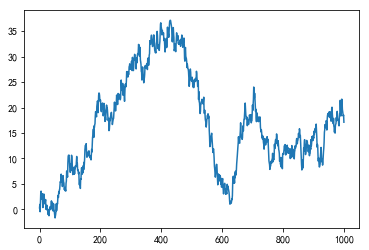

In [294]:
ts = pd.Series(np.random.randn(1000))
ts = ts.cumsum()
ts.plot()

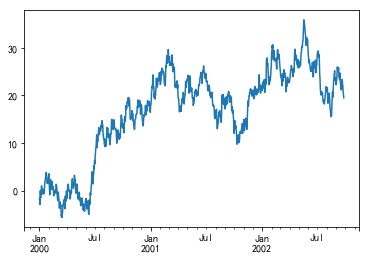

In [295]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

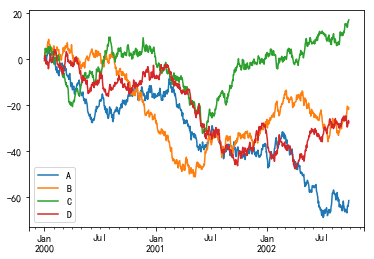

In [296]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('ABCD'))
df = df.cumsum()
df.plot()

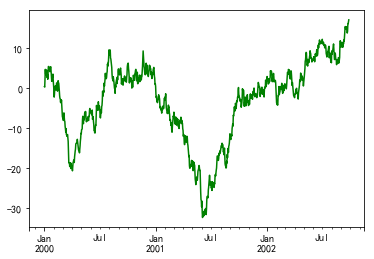

In [297]:
df['C'].plot(color='g')

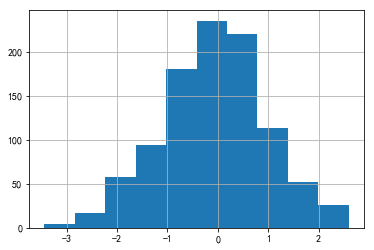

In [298]:
df['A'].diff().hist()

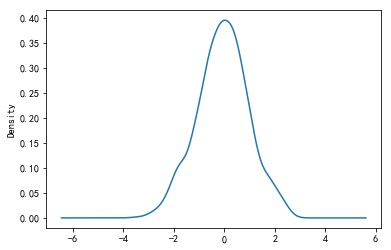

In [299]:
df['A'].diff().plot.kde()

In [300]:
df.head()

,A,B,C,D
2000-01-01,0.267768,1.232770,0.422421,-0.668669
2000-01-02,0.663913,1.876813,0.293994,0.036453
2000-01-03,0.390815,2.972036,2.524280,1.547874
2000-01-04,0.091751,2.903389,4.730945,0.572214
2000-01-05,-0.294365,3.423449,3.497556,-0.803244


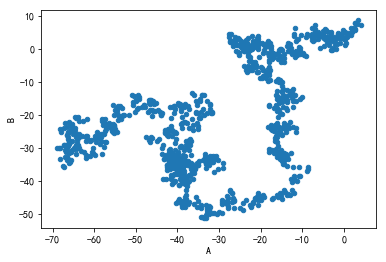

In [301]:
df.plot.scatter(x='A', y='B')

In [302]:
ts = pd.Series(3 * np.random.rand(4), 
                   index=['a', 'b', 'c', 'd'], 
                   name='test name')

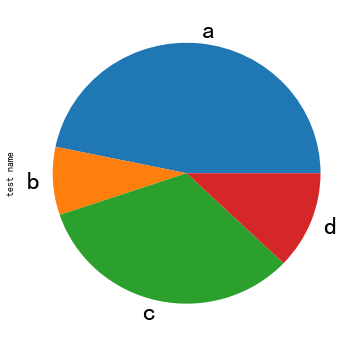

In [303]:
ts.plot.pie(figsize=(6, 6), fontsize=26)

# 例子

## 地震数据分析
earthquake_data.csv 是2013.1-6月的数据。
1. 求出其中的深度、震级的平均值。
1. 找出事件类型中地震最多的两种类型，求出其深度、震级平均值。

In [554]:
df = pd.read_csv('earthquake_data.csv')
print(df['深度(km)'].mean(), df['震级值'].mean())
two = df.groupby('事件类型').count().sort_values(by='日期').index[-2:]
mean = df[ df['事件类型'].isin(two) ].groupby('事件类型').mean()
print( mean[['深度(km)','震级值']] )

13.945881297652862 2.000827228783575
         深度(km)       震级值
事件类型                     
ep     0.000000  2.775000
eq    14.016532  1.997079


一步步的解析。。。

In [555]:
df = pd.read_csv('earthquake_data.csv')

In [556]:
df.head(3)

,日期,时间,纬度(°),经度(°),深度(km),震级类型,震级值,事件类型,参考地名
0,2013-06-25,06:04:13.0,10.70,-42.60,10,Ms,6.5,eq,中大西洋海岭北部
1,2013-06-24,14:34:48.7,44.33,84.10,6,Ms,4.1,eq,新疆维吾尔自治区塔城地区乌苏市
2,2013-06-24,13:02:01.9,44.31,84.17,8,Ms,4.3,eq,新疆维吾尔自治区塔城地区乌苏市


In [557]:
df['深度(km)'].mean()

13.945881297652862

In [558]:
df['震级值'].mean()

2.000827228783575

In [559]:
count = df.groupby('事件类型').count()

In [560]:
count

,日期,时间,纬度(°),经度(°),深度(km),震级类型,震级值,参考地名
事件类型,,,,,,,,
ep,40,40,40,40,40,40,40,40
eq,19961,19961,19961,19961,19961,19961,19961,19961
ot,20,20,20,20,20,20,20,20
sp,18,18,18,18,18,18,18,18
ss,27,27,27,27,27,27,27,27


In [561]:
count.sort_values(by='日期')

,日期,时间,纬度(°),经度(°),深度(km),震级类型,震级值,参考地名
事件类型,,,,,,,,
sp,18,18,18,18,18,18,18,18
ot,20,20,20,20,20,20,20,20
ss,27,27,27,27,27,27,27,27
ep,40,40,40,40,40,40,40,40
eq,19961,19961,19961,19961,19961,19961,19961,19961


In [562]:
count.sort_values(by='日期').index[-2:]

Index(['ep', 'eq'], dtype='object', name='事件类型')

In [563]:
df2 = df[ df['事件类型'].isin(['ep','eq']) ]
df2.groupby('事件类型').mean()

,纬度(°),经度(°),深度(km),震级值
事件类型,,,,
ep,40.416750,112.119000,0.000000,2.775000
eq,31.765524,98.790778,14.016532,1.997079


## 上证指数价格的分布

1. 画出价格、成交量随时间的变化
1. 画出价格增量、成交量的分布
1. 探索“最高价-最低价”的分布

In [28]:
df = pd.read_csv('上证指数.csv', index_col='日期', parse_dates=['日期'])

In [29]:
df.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
日期,,,,,,,,,,,
2018-10-25,'000001,上证指数,2603.7995,2606.1007,2531.5349,2540.9347,2603.2951,0.5044,0.0194,162032979,1.37630180921e+11
2018-10-24,'000001,上证指数,2603.2951,2640.4017,2577.7725,2579.9715,2594.8255,8.4696,0.3264,160060407,1.42082168653e+11
2018-10-23,'000001,上证指数,2594.8255,2659.8123,2583.2605,2652.6476,2654.8762,-60.0507,-2.2619,178343543,1.66919412302e+11
2018-10-22,'000001,上证指数,2654.8762,2675.4063,2565.6444,2565.6444,2550.4652,104.411,4.0938,211888449,1.97309812993e+11
2018-10-19,'000001,上证指数,2550.4652,2553.3867,2449.1970,2460.0808,2486.4186,64.0466,2.5759,147323558,1.30095922321e+11


In [33]:
df = df[['收盘价','最高价','最低价','开盘价','成交量']]

In [34]:
df['2018-6-10':'2018-6-6']

,收盘价,最高价,最低价,开盘价,成交量
日期,,,,,
2018-06-08,3067.1478,3100.6848,3053.2879,3100.6038,134688220
2018-06-07,3109.4988,3128.7154,3105.5779,3121.1842,127784970
2018-06-06,3115.1803,3117.5251,3103.5329,3109.1746,120196135


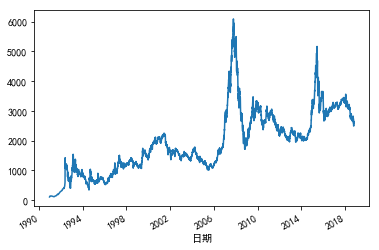

In [35]:
df['收盘价'].plot()

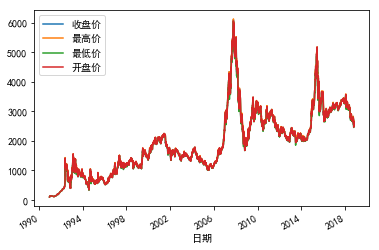

In [36]:
df[['收盘价','最高价','最低价','开盘价']].plot()

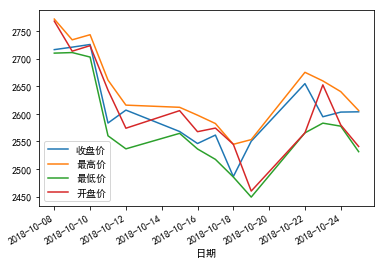

In [38]:
df[['收盘价','最高价','最低价','开盘价']]['2018-10':'2018-10'].plot()

In [55]:
diff = df['收盘价'].diff()

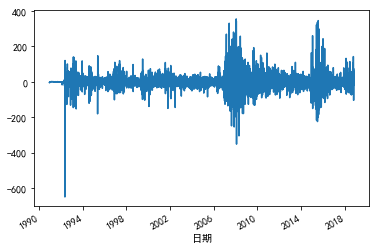

In [56]:
diff.plot()

In [61]:
diff = diff[diff>-500]

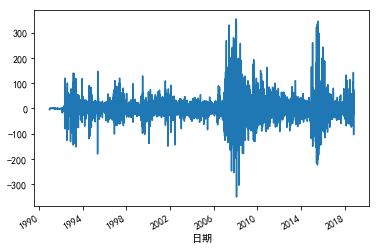

In [62]:
diff.plot()

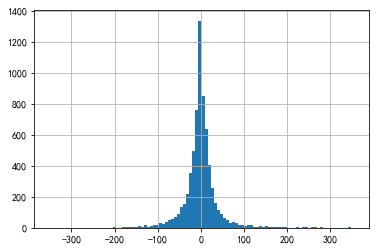

In [64]:
diff.hist(bins=100)

***思考题: 这个分布是是正态分布吗？如何验证？***

In [69]:
hl = df['最高价'] - df['最低价']

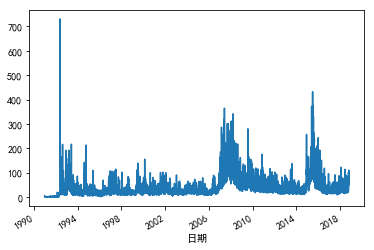

In [70]:
hl.plot()

In [71]:
hl = hl[hl<500]

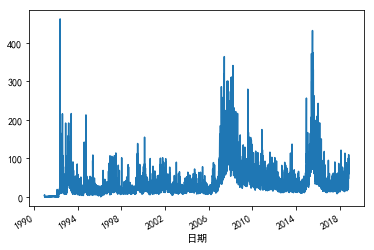

In [72]:
hl.plot()

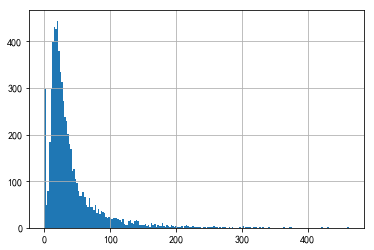

In [73]:
hl.hist(bins=200)

***思考题: 请猜测这个分布的表达式，并验证你的猜测。***

## 上证指数成交量与价差的关系
问：它们是线性关系吗？取对数后是线性的吗？

In [76]:
volume = df['成交量']

In [79]:
df2 = df[['成交量']].copy()

In [80]:
df2['价差'] = df['最高价']-df['最低价']

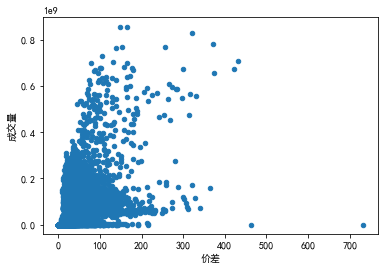

In [82]:
df2.plot.scatter(x='价差', y='成交量')

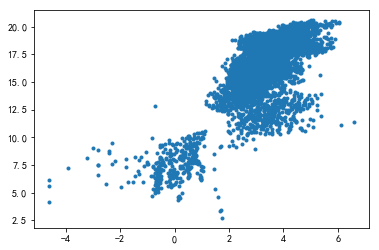

In [84]:
plt.plot(np.log(df2['价差']), np.log(df2['成交量']),'.')

# 练习题

## 空气质量

读取"空气质量.csv"文件，
（1）找出其中城市为“天津”的行；
（2）在上小题的基础上，求出天津PM2.5的值最大的200天的表格；
（3）在这200天里，是那个月份出现最多？此月份出现了多少天？

## 黑樱桃树

trees.csv

Girth, Height and Volume for Black Cherry Trees （R语言自带的一个数据集trees）

Description:

     This data set provides measurements of the girth, height and
     volume of timber in 31 felled black cherry trees.  Note that girth
     is the diameter of the tree (in inches) measured at 4 ft 6 in
     above the ground.
     
找出体积和高度与直径的关系。

```
    Girth 	Height 	Volume
0 	8.3 	70 	10.3
1 	8.6 	65 	10.3
2 	8.8 	63 	10.2
3 	10.5 	72 	16.4
4 	10.7 	81 	18.8
5 	10.8 	83 	19.7
......
```

## 间歇泉

读取课程课件 faithful.csv（取至R语言自带的一个数据集），这是一个数据集，其内容是:

 Waiting time between eruptions and the duration of the eruption
 for the Old Faithful geyser in Yellowstone National Park, Wyoming,
 USA.
     eruptions     waiting
0     3.600     79
1     1.800     54
2     3.333     74
3     2.283     62
4     4.533     85
......

（1）画出散点图；（2）分析爆发时间和等待时间的关系（用线性回归）；（3）数据点大约分成两团，求出两团中心各自的中心位置（用重心来求）。

```
    eruptions 	waiting
0 	3.600 	79
1 	1.800 	54
2 	3.333 	74
3 	2.283 	62
4 	4.533 	85
......
```